In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
os.getcwd()+'\data\\train.csv'

'C:\\Users\\visha\\Data Analysis Projects with Python\\LoanEligibilityPrediction\\data\\train.csv'

In [11]:
dataset = pd.read_csv(os.getcwd()+'\data\\train.csv')
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
dataset.shape

(614, 13)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [19]:
pd.crosstab(dataset['Credit_History'],dataset['Loan_Status'],margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

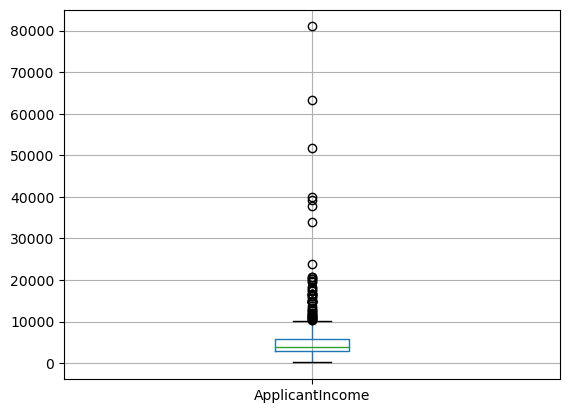

In [20]:
dataset.boxplot(column='ApplicantIncome')

<Axes: >

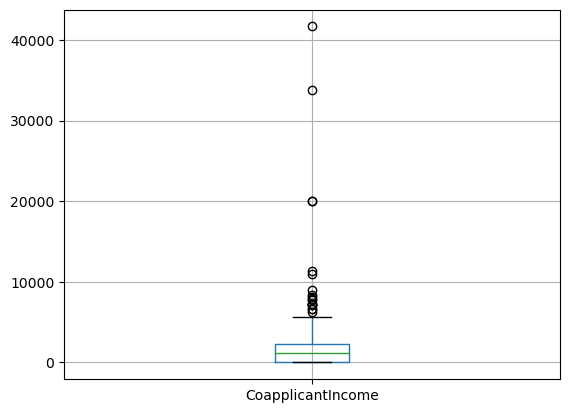

In [21]:
dataset.boxplot(column='CoapplicantIncome')

<Axes: >

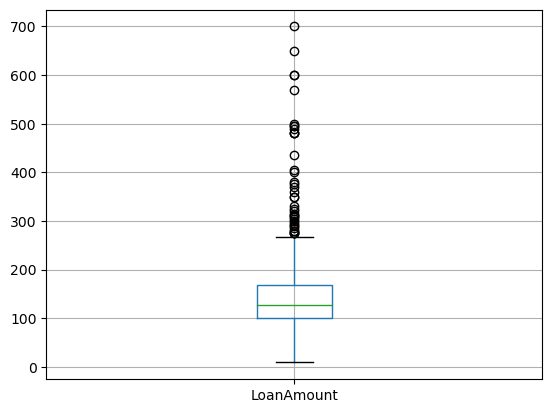

In [22]:
dataset.boxplot(column='LoanAmount')

<Axes: >

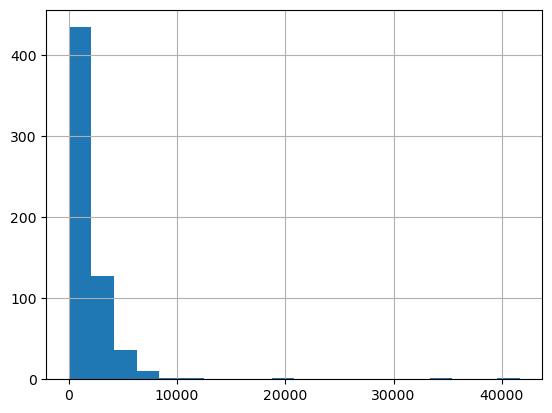

In [24]:
dataset['CoapplicantIncome'].hist(bins = 20)

<Axes: >

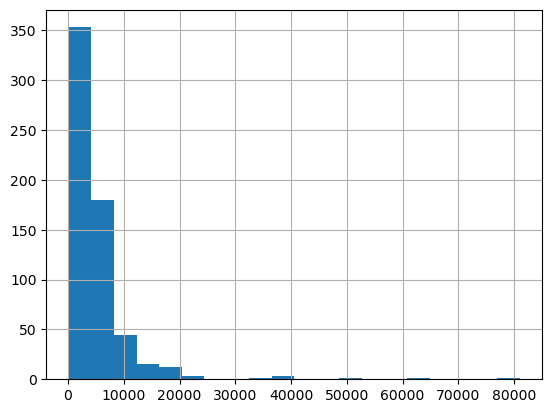

In [25]:
dataset['ApplicantIncome'].hist(bins = 20)

In [36]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
TotalIncome          0
TotalIncome_log      0
LoanAmount_log       0
dtype: int64

In [32]:
# For Categorical Variables
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace = True)
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace = True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace = True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace = True)


# For Numeric Variables
dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean(),inplace = True)
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace = True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace = True)

In [34]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [35]:
dataset['TotalIncome_log'] = np.log(dataset.TotalIncome)
dataset['LoanAmount_log'] = np.log(dataset.LoanAmount)


<Axes: >

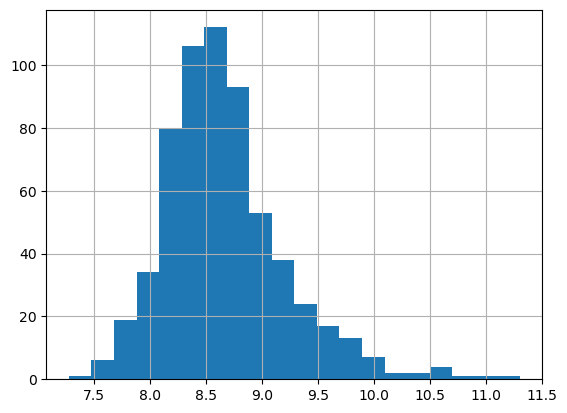

In [37]:
dataset.TotalIncome_log.hist(bins = 20) 

In [39]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.714568,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,8.505323,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760


In [90]:
# Lets Divide the dataset into dependent and independent Variables
X = dataset.iloc[:,np.r_[1:5,9:12,14:16]].values
Y = dataset.iloc[:,12].values
X

array([['Male', 'No', '0', ..., 'Urban', 8.674025985443025,
        4.986425672954842],
       ['Male', 'Yes', '1', ..., 'Rural', 8.714567550836485,
        4.852030263919617],
       ['Male', 'Yes', '0', ..., 'Urban', 8.006367567650246,
        4.189654742026425],
       ...,
       ['Male', 'Yes', '1', ..., 'Urban', 9.025455532779063,
        5.53338948872752],
       ['Male', 'Yes', '2', ..., 'Urban', 8.933664178700935,
        5.231108616854587],
       ['Female', 'No', '0', ..., 'Semiurban', 8.430109084509125,
        4.890349128221754]], dtype=object)

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0) # Random state 0 coz we dont want result to change in every cycle

In [92]:
# Using Label Encoder to convert Categorical text into numerical format
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
for i in range(0,7):
    X_train[:,i] = labelencoder_x.fit_transform(X_train[:,i])
    X_test[:,i] = labelencoder_x.fit_transform(X_test[:,i])
labelencoder_y = LabelEncoder()
Y_train = labelencoder_y.fit_transform(Y_train)
Y_test = labelencoder_y.fit_transform(Y_test)

In [93]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [94]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier(criterion='entropy',random_state=0)
DTClassifier.fit(X_train,Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [95]:
Y_pred = DTClassifier.predict(X_test)
Y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1])

In [96]:
from sklearn import metrics
print('The Accuracy of the decision tree Model: ',metrics.accuracy_score(Y_pred,Y_test))

The Accuracy of the decision tree Model:  0.7154471544715447


In [97]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train,Y_train)

GaussianNB()

In [98]:
Y_predNB = NBClassifier.predict(X_test)
print('The Accuracy of the decision tree Model: ',metrics.accuracy_score(Y_predNB,Y_test))

The Accuracy of the decision tree Model:  0.8292682926829268


In [99]:
testdata = pd.read_csv(os.getcwd()+'\data\\test.csv')
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [100]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace = True)
testdata['Married'].fillna(testdata['Married'].mode()[0],inplace = True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace = True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace = True)
# For Numeric Variables
testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean(),inplace = True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace = True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace = True)
testdata['TotalIncome'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['TotalIncome_log'] = np.log(testdata.TotalIncome)
testdata['LoanAmount_log'] = np.log(testdata.LoanAmount)
testdata

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,TotalIncome_log,LoanAmount_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,8.651724,4.700480
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,8.428581,4.836282
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,8.824678,5.337538
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,8.494129,4.605170
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,8.094378,4.356709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,5786,8.663196,4.727388
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,4867,8.490233,4.744932
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban,5243,8.564649,4.836282
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,7393,8.908289,5.062595


In [101]:
test = testdata.iloc[:,np.r_[1:5,9:12,13:15]].values
test

array([['Male', 'Yes', '0', ..., 'Urban', 8.651724084373843,
        4.700480365792417],
       ['Male', 'Yes', '1', ..., 'Urban', 8.428580533059634,
        4.836281906951478],
       ['Male', 'Yes', '2', ..., 'Urban', 8.824677891164198,
        5.337538079701318],
       ...,
       ['Male', 'No', '0', ..., 'Semiurban', 8.564649132572534,
        4.836281906951478],
       ['Male', 'Yes', '0', ..., 'Rural', 8.9082888855571,
        5.062595033026967],
       ['Male', 'No', '0', ..., 'Rural', 9.126958763037132,
        4.584967478670572]], dtype=object)

In [102]:
for i in range(0,7):
    test[:,i] = labelencoder_x.fit_transform(test[:,i])
test

array([[1, 1, 0, ..., 2, 8.651724084373843, 4.700480365792417],
       [1, 1, 1, ..., 2, 8.428580533059634, 4.836281906951478],
       [1, 1, 2, ..., 2, 8.824677891164198, 5.337538079701318],
       ...,
       [1, 0, 0, ..., 1, 8.564649132572534, 4.836281906951478],
       [1, 1, 0, ..., 0, 8.9082888855571, 5.062595033026967],
       [1, 0, 0, ..., 0, 9.126958763037132, 4.584967478670572]],
      dtype=object)

In [104]:
test = ss.fit_transform(test)
test_pred = NBClassifier.predict(test)

In [106]:
test_pred = ['N' if element == 0 else 'Y' for element in test_pred]
test_pred

['Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'Y',
 'N',
 'Y',
 'Y',
 'Y',
 'N',
 'N'